# **Installing Spark and set up environment**

**Mount Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!curl -O https://raw.githubusercontent.com/deepjavalibrary/d2l-java/master/tools/fix-colab-gpu.sh && bash fix-colab-gpu.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   155  100   155    0     0    714      0 --:--:-- --:--:-- --:--:--   714
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [3]:
!curl -O https://raw.githubusercontent.com/deepjavalibrary/d2l-java/master/tools/colab_build.sh && bash colab_build.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   520  100   520    0     0   3561      0 --:--:-- --:--:-- --:--:--  3561
Update environment...
Install Java...
Install Jupyter java kernel...


**Install Java**

In [4]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

**Downloading Spark**

In [5]:
#!wget -q https://downloads.apache.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!wget -q https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz  

**Extracting Spark file**

In [6]:
!tar xf spark-3.1.2-bin-hadoop3.2.tgz

**Installing** **FindSpark**

In [7]:
!pip install -q findspark

**Setting up Environment for Spark and Java**

In [8]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

**Import FindSpark**

In [9]:
import findspark
findspark.init();

In [10]:
findspark.find()

'/content/spark-3.1.2-bin-hadoop3.2'

In [11]:
ls

colab_build.sh  fix-colab-gpu.sh  sample_data/
d2l-java/       ijava-kernel/     spark-3.1.2-bin-hadoop3.2/
drive/          ijava-kernel.zip  spark-3.1.2-bin-hadoop3.2.tgz


**Creating Spark Session**

In [12]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [13]:
spark

In [14]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels

--2021-07-19 13:46:16--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.218.70.191, 52.45.2.162, 34.230.251.58, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.218.70.191|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  30.8MB/s    in 0.4s    

2021-07-19 13:46:17 (30.8 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
{"tunnels":[],"uri":"/api/tunnels"}


**Check the directory**

In [15]:
ls -l

total 269652
-rw-r--r--  1 root root       520 Jul 19 13:44 colab_build.sh
drwxr-xr-x 26 root root      4096 Jul 19 13:45 d2l-java/
drwx------  6 root root      4096 Jul 19 13:43 drive/
-rw-r--r--  1 root root       155 Jul 19 13:44 fix-colab-gpu.sh
drwxr-xr-x  3 root root      4096 Jul 19 13:44 ijava-kernel/
-rw-r--r--  1 root root   3366077 Jul 19 13:44 ijava-kernel.zip
-rwxr-xr-x  1 root root  30053267 May  4 14:20 ngrok*
-rw-r--r--  1 root root  13832437 Jul 19 13:46 ngrok-stable-linux-amd64.zip
drwxr-xr-x  1 root root      4096 Jul 15 13:38 sample_data/
drwxr-xr-x 13 1000 1000      4096 May 24 04:45 spark-3.1.2-bin-hadoop3.2/
-rw-r--r--  1 root root 228834641 May 24 05:01 spark-3.1.2-bin-hadoop3.2.tgz


**Checking Spark version**

In [16]:
spark.version

'3.1.2'

 # **Build ML model**

Load the concatenated **pIC50** and **low-varianced data**.

**2_merged_pIC50_preprocessed_low_variance.csv** is formed as the diagram below. Copy the pIC50 from **2_class_pIC50.csv** then concatenate the pIC50 with **2_merged_pIC50_preprocessed_low_variance.csv**.

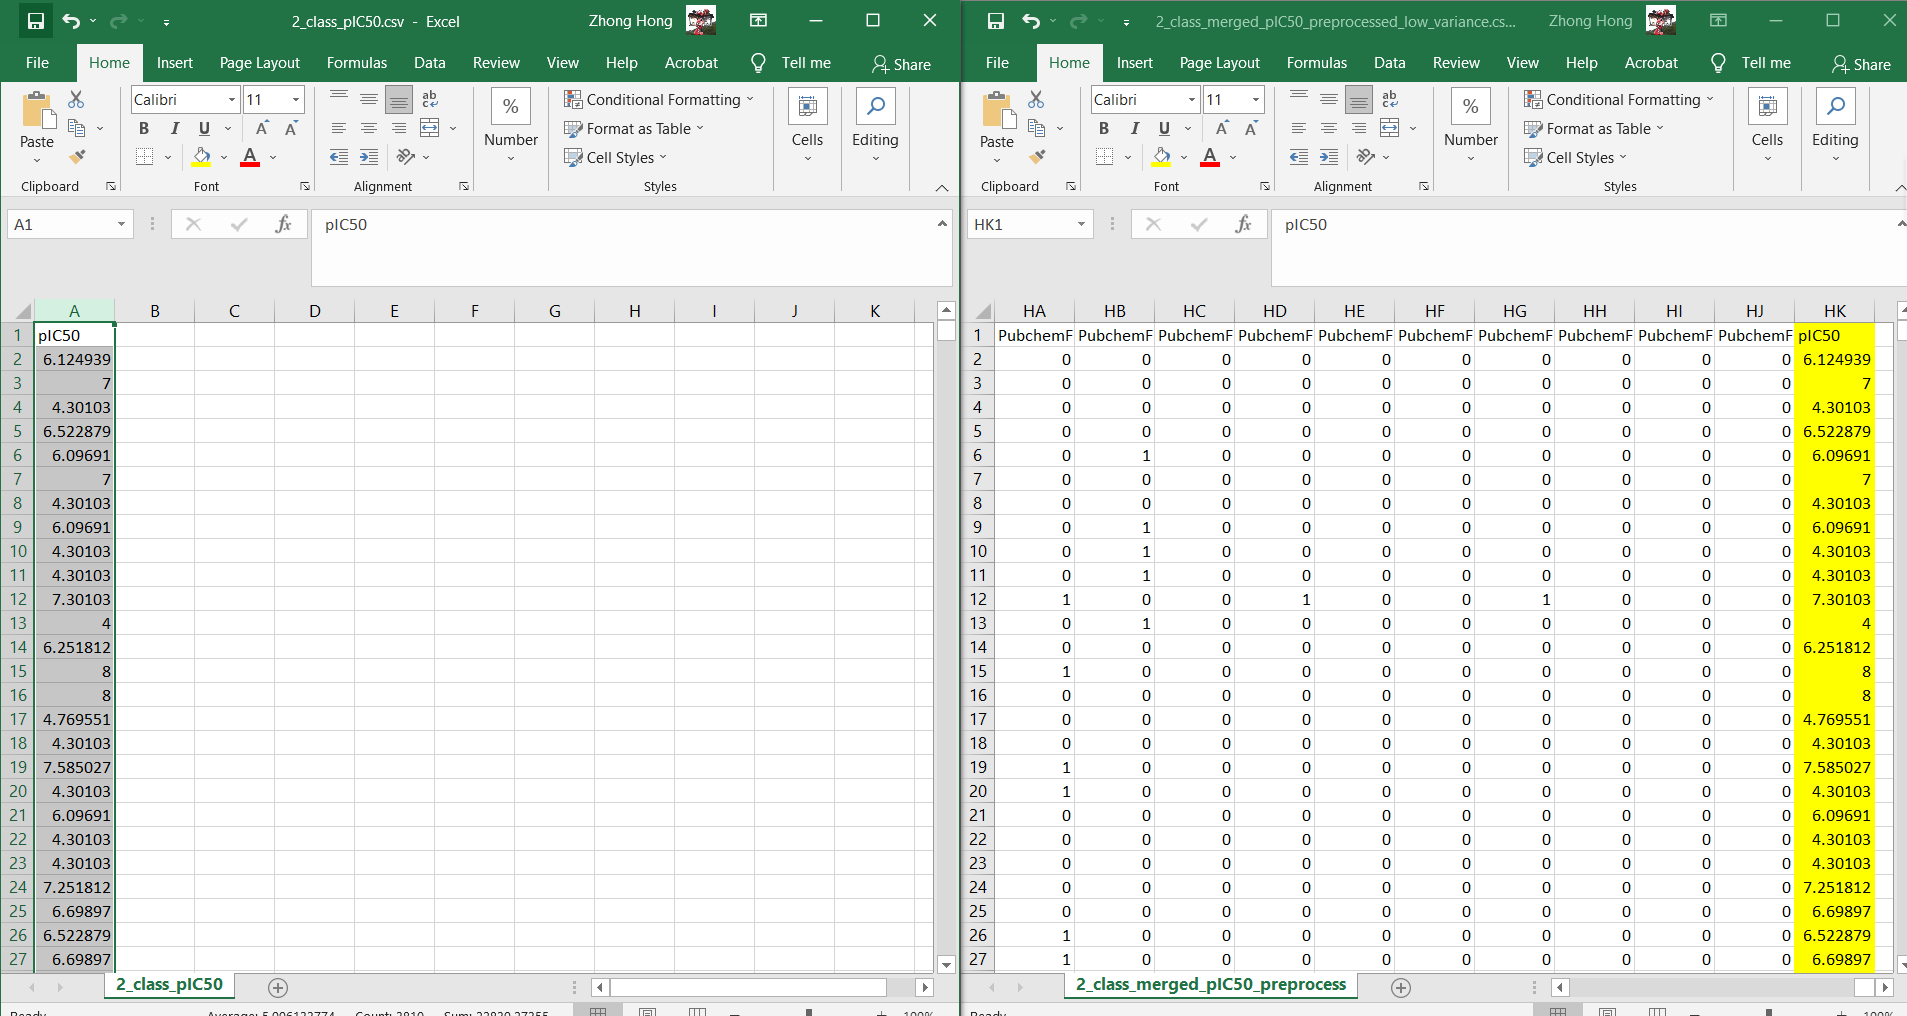

In [17]:
df_concat = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/Preprocessed Data/2_merged_pIC50_preprocessed_low_variance.csv",header=True,inferSchema=True)
df_concat.show()

+----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+---------

**Examine the data dimension**

In [18]:
print((df_concat.count(), len(df_concat.columns)))

(5043, 219)


## **Code for converting the data to dense vector**

In [19]:
def get_dummy(df,indexCol,categoricalCols,continuousCols,labelCol):

    from pyspark.ml import Pipeline
    from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
    from pyspark.sql.functions import col

    indexers = [ StringIndexer(inputCol=c, outputCol="{0}_indexed".format(c))
                 for c in categoricalCols ]

    # default setting: dropLast=True
    encoders = [ OneHotEncoder(inputCol=indexer.getOutputCol(),
                 outputCol="{0}_encoded".format(indexer.getOutputCol()))
                 for indexer in indexers ]

    assembler = VectorAssembler(inputCols=[encoder.getOutputCol() for encoder in encoders]
                                + continuousCols, outputCol="features")

    pipeline = Pipeline(stages=indexers + encoders + [assembler])

    model=pipeline.fit(df)
    data = model.transform(df)

    data = data.withColumn('label',col(labelCol))

    return data.select(indexCol,'features','label')

In [20]:
from pyspark.sql import Row
from pyspark.ml.linalg import Vectors

def transData(data):
    return data.rdd.map(lambda r: [Vectors.dense(r[:-1]),r[-1]]).toDF(['features','label'])

**Convert the concatenated data to dense vector**

In [21]:
transformed_concat = transData(df_concat)
transformed_concat.show(10)

+--------------------+-----------+
|            features|      label|
+--------------------+-----------+
|[0.0,1.0,0.0,1.0,...|6.124938737|
|[0.0,1.0,0.0,1.0,...|        7.0|
|[0.0,1.0,0.0,1.0,...|4.301029996|
|[0.0,1.0,0.0,1.0,...|6.522878745|
|[0.0,0.0,0.0,1.0,...|6.096910013|
|[0.0,0.0,0.0,1.0,...|5.619788758|
|[0.0,1.0,0.0,1.0,...|        7.0|
|[0.0,0.0,0.0,1.0,...|4.301029996|
|[0.0,1.0,0.0,1.0,...|6.096910013|
|[0.0,1.0,0.0,1.0,...|4.301029996|
+--------------------+-----------+
only showing top 10 rows



**Deal with categorical variable**

In [22]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

featureIndexer = VectorIndexer(inputCol="features", \
                               outputCol="indexedFeatures",\
                               maxCategories=4).fit(transformed_concat)

data = featureIndexer.transform(transformed_concat)
data.show(5,True)

+--------------------+-----------+--------------------+
|            features|      label|     indexedFeatures|
+--------------------+-----------+--------------------+
|[0.0,1.0,0.0,1.0,...|6.124938737|[0.0,1.0,0.0,1.0,...|
|[0.0,1.0,0.0,1.0,...|        7.0|[0.0,1.0,0.0,1.0,...|
|[0.0,1.0,0.0,1.0,...|4.301029996|[0.0,1.0,0.0,1.0,...|
|[0.0,1.0,0.0,1.0,...|6.522878745|[0.0,1.0,0.0,1.0,...|
|[0.0,0.0,0.0,1.0,...|6.096910013|[0.0,0.0,0.0,1.0,...|
+--------------------+-----------+--------------------+
only showing top 5 rows



## **Splitting the dataset into traning set and test set (80%, 20%)**

In [23]:
train_df_concat, test_df_concat = data.randomSplit([0.8,0.2],seed=100)

In [24]:
train_df_concat.show(5)
test_df_concat.show(5)

+--------------------+-----------+--------------------+
|            features|      label|     indexedFeatures|
+--------------------+-----------+--------------------+
|[0.0,0.0,0.0,0.0,...|2.622000001|[0.0,0.0,0.0,0.0,...|
|[0.0,0.0,0.0,0.0,...|4.585026652|[0.0,0.0,0.0,0.0,...|
|[0.0,0.0,0.0,0.0,...| 5.30980392|[0.0,0.0,0.0,0.0,...|
|[0.0,0.0,0.0,0.0,...| 5.30980392|[0.0,0.0,0.0,0.0,...|
|[0.0,0.0,0.0,0.0,...| 5.30980392|[0.0,0.0,0.0,0.0,...|
+--------------------+-----------+--------------------+
only showing top 5 rows

+--------------------+-----------+--------------------+
|            features|      label|     indexedFeatures|
+--------------------+-----------+--------------------+
|[0.0,0.0,0.0,0.0,...|6.420216403|[0.0,0.0,0.0,0.0,...|
|[0.0,0.0,0.0,0.0,...|3.223999998|[0.0,0.0,0.0,0.0,...|
|[0.0,0.0,0.0,0.0,...|2.535000001|[0.0,0.0,0.0,0.0,...|
|[0.0,0.0,0.0,0.0,...|        8.0|[0.0,0.0,0.0,0.0,...|
|[0.0,0.0,0.0,0.0,...|2.821000001|[0.0,0.0,0.0,0.0,...|
+--------------------+-

Dimension for **training set**

In [25]:
print("Dimension for training set:",(train_df_concat.count(), len(train_df_concat.columns)))

Dimension for training set: (4045, 3)


Dimension for **test set**

In [26]:
print("Dimension for test set: ",(test_df_concat.count(), len(test_df_concat.columns)))

Dimension for test set:  (998, 3)


## **Build and train random forest regression model**

Import libraries

In [27]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [28]:
feature_list = []
for col in transformed_concat.columns:
    if col == 'label':
        continue
    else:
        feature_list.append(col)

assembler = VectorAssembler(inputCols=feature_list, outputCol="features")

In [29]:
# Define LinearRegression algorithm
rf = RandomForestRegressor(featuresCol="features", numTrees=50, maxDepth = 10, seed=42) # featuresCol="indexedFeatures",numTrees=2, maxDepth=2, seed=42
#rf = RandomForestRegressor(featuresCol="features", numTrees=200, maxDepth = 25, seed=42) # featuresCol="indexedFeatures",numTrees=2, maxDepth=2, seed=42

Pipeline architecture

In [30]:
# Chain indexer and tree in a Pipeline
pipeline = Pipeline(stages=[featureIndexer, rf])
#pipeline = Pipeline(stages=[assembler, rf])
model = pipeline.fit(train_df_concat)

In [31]:
from pyspark.ml.tuning import ParamGridBuilder
import numpy as np

paramGrid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [int(x) for x in np.linspace(start = 10, stop = 50, num = 3)]) \
    .addGrid(rf.maxDepth, [int(x) for x in np.linspace(start = 5, stop = 25, num = 3)]) \
    .build()

**5-fold Cross-validation** for the training set.

In [32]:
from pyspark.ml.tuning import CrossValidator

crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=RegressionEvaluator(),
                          numFolds=5)

In [33]:
cvModel = crossval.fit(train_df_concat)

Make a prediction

In [34]:
predictions = cvModel.transform(test_df_concat)

predictions.select("features","label", "prediction").show(30)

+--------------------+-----------+------------------+
|            features|      label|        prediction|
+--------------------+-----------+------------------+
|[0.0,0.0,0.0,0.0,...|6.420216403|  4.53916310917015|
|[0.0,0.0,0.0,0.0,...|3.223999998|4.0420075056357945|
|[0.0,0.0,0.0,0.0,...|2.535000001| 4.134830686429907|
|[0.0,0.0,0.0,0.0,...|        8.0| 7.094387932122187|
|[0.0,0.0,0.0,0.0,...|2.821000001| 4.223920120727389|
|[0.0,0.0,0.0,0.0,...|      2.762| 4.053150073542489|
|[0.0,0.0,0.0,0.0,...|        5.0| 4.963685704675236|
|[0.0,0.0,0.0,0.0,...| 6.48148606| 5.057695688548766|
|[0.0,0.0,0.0,0.0,...|3.461999999| 4.764840175231978|
|[0.0,0.0,0.0,0.0,...|      3.912| 4.176748804954141|
|[0.0,0.0,0.0,0.0,...|        5.0| 5.182373844641744|
|[0.0,0.0,0.0,0.0,...|        5.0| 5.443089450100856|
|[0.0,0.0,0.0,0.0,...|3.850000014| 5.426544796608559|
|[0.0,0.0,0.0,0.0,...|4.602059991| 5.051608981557996|
|[0.0,0.0,0.0,0.0,...| 5.30980392| 4.650554679125467|
|[0.0,0.0,0.0,0.0,...|6.4202

In [ ]:
prediction_list = predictions.select("label", "prediction")
prediction_list.toPandas().to_csv("2_class_human_prediction_pIC50_list.csv")

Evaluation for the model

In [35]:
# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 1.02545


In [36]:
y_true = predictions.select("label").toPandas()
y_pred = predictions.select("prediction").toPandas()

import sklearn.metrics
r2_score = sklearn.metrics.r2_score(y_true, y_pred)
print('r2_score: {0}'.format(r2_score))

r2_score: 0.5845712527199449


In [37]:
model.stages[1].featureImportances

SparseVector(218, {0: 0.0486, 1: 0.0079, 2: 0.0095, 3: 0.0044, 4: 0.005, 5: 0.002, 6: 0.0041, 7: 0.005, 8: 0.0091, 9: 0.0043, 10: 0.0073, 11: 0.0028, 12: 0.0042, 13: 0.0042, 14: 0.0036, 15: 0.0134, 16: 0.0065, 17: 0.003, 18: 0.0056, 19: 0.004, 20: 0.0039, 21: 0.0035, 22: 0.0121, 23: 0.0053, 24: 0.0057, 25: 0.0032, 26: 0.0036, 27: 0.0164, 28: 0.0081, 29: 0.0217, 30: 0.0013, 31: 0.0014, 32: 0.0056, 33: 0.0162, 34: 0.0033, 35: 0.0167, 36: 0.0095, 37: 0.0042, 38: 0.0015, 39: 0.0005, 40: 0.0018, 41: 0.0069, 42: 0.0009, 43: 0.0014, 44: 0.0014, 45: 0.0016, 46: 0.0017, 47: 0.0036, 48: 0.0025, 49: 0.0028, 50: 0.0054, 51: 0.0011, 52: 0.0023, 53: 0.0035, 54: 0.0051, 55: 0.0028, 56: 0.0002, 57: 0.0003, 58: 0.0034, 59: 0.0026, 60: 0.0005, 61: 0.011, 62: 0.0084, 63: 0.0048, 64: 0.0005, 65: 0.0026, 66: 0.0004, 67: 0.0019, 68: 0.0025, 69: 0.0019, 70: 0.0048, 71: 0.0012, 72: 0.0071, 73: 0.0038, 74: 0.0021, 75: 0.0012, 76: 0.003, 77: 0.0021, 78: 0.0021, 79: 0.0012, 80: 0.0022, 81: 0.0056, 82: 0.0008, 83

Visualize the **predicted pIC50** and **experimental pIC50**.

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

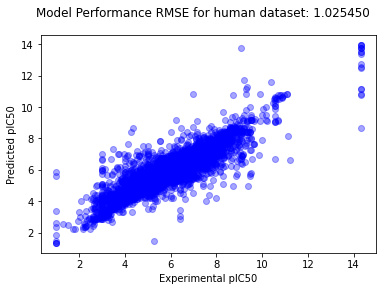

In [39]:
rfPred = cvModel.transform(data)

rfResult = rfPred.toPandas()

plt.plot(rfResult.label, rfResult.prediction, 'bo', alpha=0.35)
plt.xlabel('Experimental pIC50')
plt.ylabel('Predicted pIC50')
plt.suptitle("Model Performance RMSE for human dataset: %f" % rmse)

plt.savefig("prediction_pIC50_human.jpg")

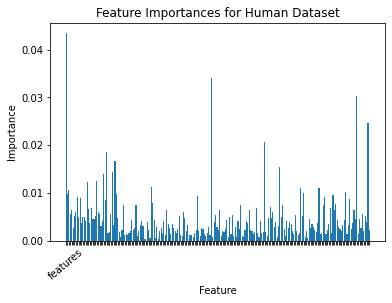

In [40]:
bestPipeline = cvModel.bestModel
bestModel = bestPipeline.stages[1]

importances = bestModel.featureImportances

x_values = list(range(len(importances)))

plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation=40)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances for Human Dataset')

plt.savefig("feature_importances_human.jpg", bbox_inches = 'tight')

In [41]:
print('numTrees - ', bestModel.getNumTrees)
print('maxDepth - ', bestModel.getOrDefault('maxDepth'))

numTrees -  50
maxDepth -  15
